# Neural Networks
Week Seven - Sept 5, 2022

... also a brief intro to the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)

## Chapter 18 - 

In [1]:
import sys
# Let us first install the scikit-learn packages
!conda install --yes --prefix {sys.prefix} scikit-learn
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib



/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found


Activation function

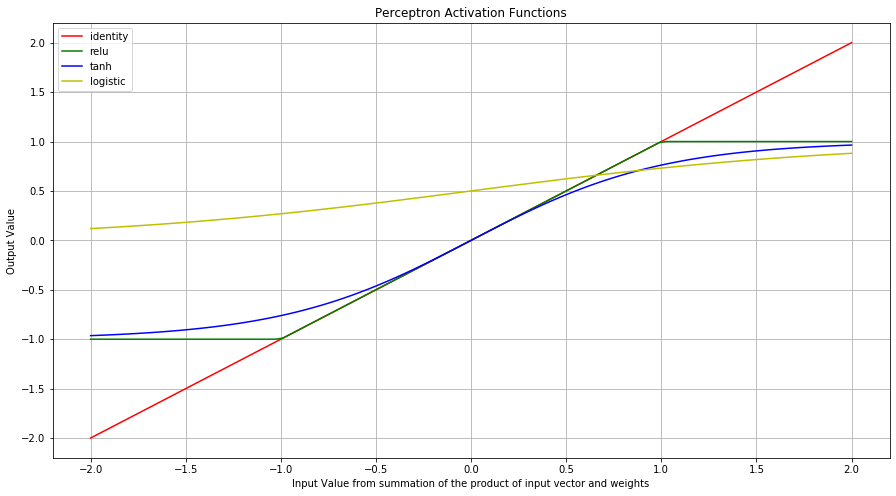

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-2, 2, 100)
y1 = [ i for i in x]
y2 = [ max(-1,min(i,1)) for i in x]
y3 = np.tanh(
    x)  
y4 = [(1/(1+math.exp(-i))) for i in x] 

fig, ax = plt.subplots()
ax.plot(x, y1, color='r', label='identity')
ax.plot(x, y2, color='g', label='relu')
ax.plot(x, y3, color='b', label='tanh')
ax.plot(x, y4, color='y', label='logistic')
plt.gcf().set_size_inches(15,8)
plt.xlabel("Input Value from summation of the product of input vector and weights")
plt.ylabel("Output Value")
plt.title("Perceptron Activation Functions")
plt.grid(True, which='both')
plt.legend()
plt.show()


## Can we teach a perceptron some basic 'AND' boolean logic?

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(100):                    # <-- We need sufficient training data, so expirement with larger training data sizes here
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a and b)
    X1_train.append([a, b])
    y1_train.append(c)

print("Training the model...")
ptron = Perceptron()
ptron.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a and b)
    X1_test.append([a, b])
    y1_test.append(c)
    
print("Results...")
train_error = MSE(y1_train, ptron.predict(X1_train))
results = ptron.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()

## Can we teach a perceptron some basic 'XOR' boolean logic?

Building Training data...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.2386
Overall Test Error     = 0.2700


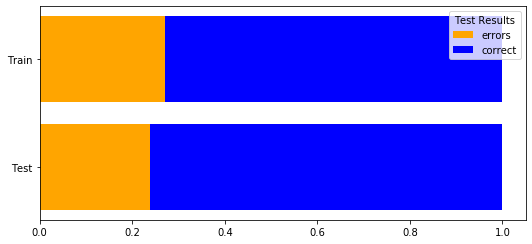

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(5000):                    # <-- We need sufficient training data, so expirement with larger training data sizes here
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_train.append([a, b])
    y1_train.append(c)

print("Training the model...")
ptron = Perceptron()
ptron.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_test.append([a, b])
    y1_test.append(c)
    
print("Results...")
train_error = MSE(y1_train, ptron.predict(X1_train))
results = ptron.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()

## What about a multi-layer perceptron?

Building Training data...
Creating a model base...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.1237
Overall Test Error     = 0.1282


/home/bparker/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


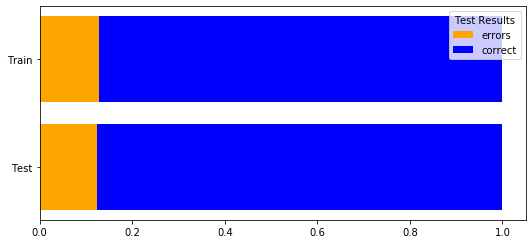

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(1000):                    # <-- We need sufficient training data, so expirement with larger training data sizes here (hint: add a zero)
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Creating a model base...")
ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='tanh',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(2),
            random_state=1,
            max_iter=200,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

print("Training the model...")
ann.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_test.append([a, b])
    y1_test.append(c)

print("Results...")
train_error = MSE(y1_train, ann.predict(X1_train))
results = ann.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()

## How about some fundamental math?

Building Training data...
Creating a model base...
Training the model...
Building Test data...
Results...
Overall Training Error = 1.7467259330228064
Overall Test Error     = 1.8064329068946727
IF a=3 and b=4, then c=  [5.23373472]


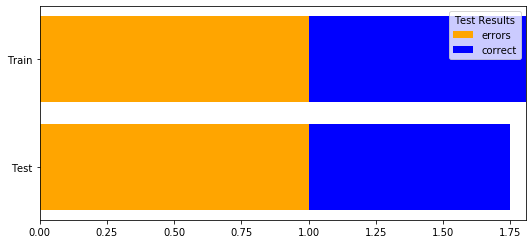

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as PERERR
import matplotlib.pyplot as plt
import math
import random


#### Pythagorean Theorem (a^2 + b^2 = c^2)
X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(50000):
    a = random.random() * 1000
    b = random.random() * 1000
    c = math.sqrt(a*a + b*b)    # Pythagorean Theorem
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Creating a model base...")
ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(20,15,2,15,20),
            random_state=1,
            max_iter=500,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

print("Training the model...")
ann.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.random() * 1000          # <-- Consider the magnitude of the domain/range here and how that might effect the error calculation...
    b = random.random() * 1000
    c = math.sqrt(a*a + b*b)    # Pythagorean Theorem
    X1_test.append([a, b])
    y1_test.append(c)

print("Results...")

results = ann.predict(X1_test)

test_error = MSE(y1_test, results, squared=True)
#test_error = PERERR(y1_test, results, squared=True)

train_error = MSE(y1_train, ann.predict(X1_train))
#train_error = PERERR(y1_train, ann.predict(X1_train))

print("Overall Training Error = %s" % train_error)
print("Overall Test Error     = %s" % test_error)
print("IF a=3 and b=4, then c=  %s" % ann.predict([[3,4]]))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()




## What about a function we don't know how to write necessarily?

Pop quiz: without using a lookup table or a Trigonometric Identity, how do you compute the tangent function (i.e., tan(angle))? 
... unless you have an advanced degree in mathematics (or are a true math nerd), you probably don't know... but can we still teach a neural network?


Building Training data...
Creating a model base...
Training the model...
Building Test data...
Results...
Overall Training Error = 1363.6317408505515
Overall Test Error     = 23.720148843891597


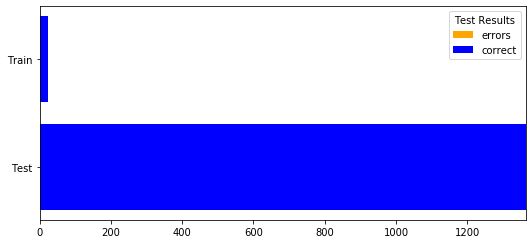

ValueError: Expected 2D array, got 1D array instead:
array=[-6.28318531  1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import matplotlib.pyplot as plt
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(5000):
    a = random.random() * 2 * 3.141592
    b = 1
    c = math.tan(a)                     # Tangent Funtion
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Creating a model base...")
ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='tanh',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(50,50),
            random_state=1,
            max_iter=200,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

print("Training the model...")
ann.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.random() * 2 * 3.141592
    b = 1
    c = math.tan(a)                     # Tangent Funtion
    X1_test.append([a, b])
    y1_test.append(c)

print("Results...")
train_error = MSE(y1_train, ann.predict(X1_train))
results = ann.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = %s" % train_error)
print("Overall Test Error     = %s" % test_error)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()


x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
fx = np.tan(x)
hx = [ann.predict([i, 1])[0] for i in x]

fig, ax = plt.subplots()
ax.plot(x, fx, color='b', label='f(x)')
ax.plot(x, hx, color='g', label='h(x)')
plt.gcf().set_size_inches(15,10)
plt.title("True vs NN tan(x)")
plt.grid(True, which='both')
plt.legend()
plt.show()